# Project: Ford GoBike Data Analysis
## by Hagop Bozawglanian

## Investigation Overview

This investigation will look into the data set for ride share bikes in the San Fransisco Bay Area. The data includes categories that could be used to predict the ride durations. The main focus will be on user types, age range, and genders utilizing univariate, bivariate, and multivariate visualizations.

## Dataset Overview

After the data was cleaned we ended with the following data.

The data covers 453,159 rows across 9 columns in 2017:

- 272 start stations
- 272 end stations
- 7 start month categories: Jun 2017 to Dec 2017
- 8 end month categories: Jun 2017 to Jan 2018
- 2 user types: Customer and Subscriber
- 7 age ranges: 18-24, 25-34, 35-44, 45-54, 55-64, 65-74, 75+
- 3 gender types: Male, Female, and Other

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('clean_data.csv')

In [3]:
#categorize member_age into a new column called 'member_age_range'
bins = [18, 25, 35, 45, 55, 65, 75, np.inf]
age_categories = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
df_clean['member_age_range'] = pd.cut(df_clean['member_age'], bins, labels = age_categories)

## First Visualization

**Question**

Do people end trips where they started?

**Answer**

Here we can see that an overwhelming majority of bikes are not returned to the original starting station they were taken from.

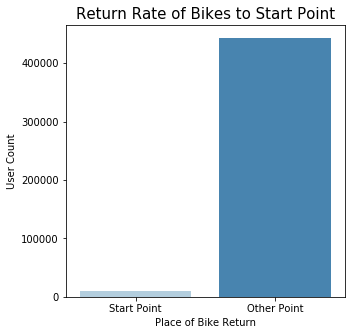

In [4]:
circle = df_clean.query('start_station_id == end_station_id').count()[1]
non_circle = df_clean.query('start_station_id != end_station_id').count()[1]
y_values = [circle, non_circle]
x_values = ['Start Point', 'Other Point']
plt.figure(figsize = [5, 5])
plt.title('Return Rate of Bikes to Start Point', size = "15")
ax = sb.barplot(x = x_values, y = y_values, palette = 'Blues')
ax.set(xlabel='Place of Bike Return', ylabel='User Count');

## Second Visualization

**Question:**

What is the proportion of subscribers vs customers for the age ranges?

**Answer**

The result of the plot is in terms of user age range and user type. It shows the amount of rides by users in the age ranges along with user type data. We can use this to see that the section with the most users are generally subscribers and younger age ranges with the peak being subscribers between 25-34.

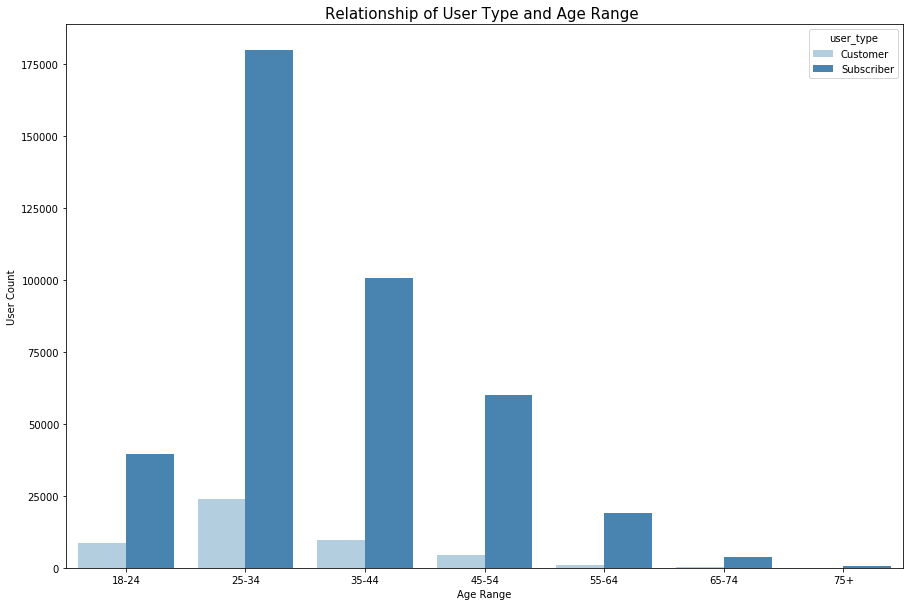

In [5]:
#count plot of user_type vs member_gender
plt.figure(figsize = [15, 10])
plt.title('Relationship of User Type and Age Range ', size = "15")
ax = sb.countplot(data = df_clean, x = 'member_age_range', hue = 'user_type', palette = 'Blues')
ax.set(xlabel='Age Range', ylabel='User Count')
plt.show();

## Third Visualization

**Question:**

What is the distribution of riders in terms of gender and age?

**Answer**

The result of the plot is in terms of user age range and user gender. It shows the amount of rides by users in the age ranges along with gender data. We can use this to see that the section with the most users are generally men and younger age ranges with the peak being men between 25-34. 

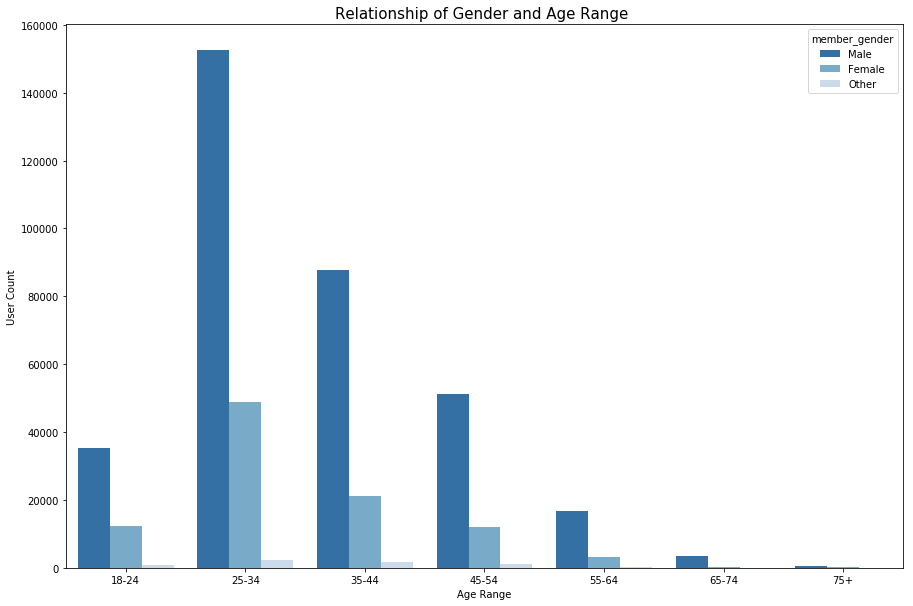

In [6]:
#count plot of member_age_range vs member_gender
plt.figure(figsize = [15, 10])
plt.title('Relationship of Gender and Age Range ', size = "15")
ax = sb.countplot(data = df_clean, x = 'member_age_range', hue = 'member_gender', palette = 'Blues_r')
ax.set(xlabel='Age Range', ylabel='User Count')
plt.show();

## Fourth Visualization

**Question:**

Which month had the most customers/subscribers?

**Answer**

The result of the plot is in terms of the user type across the months in the data set. We can use this to see that the section with the most users are generally subscribers and have peak usage after August with the peak in subscribers in October.

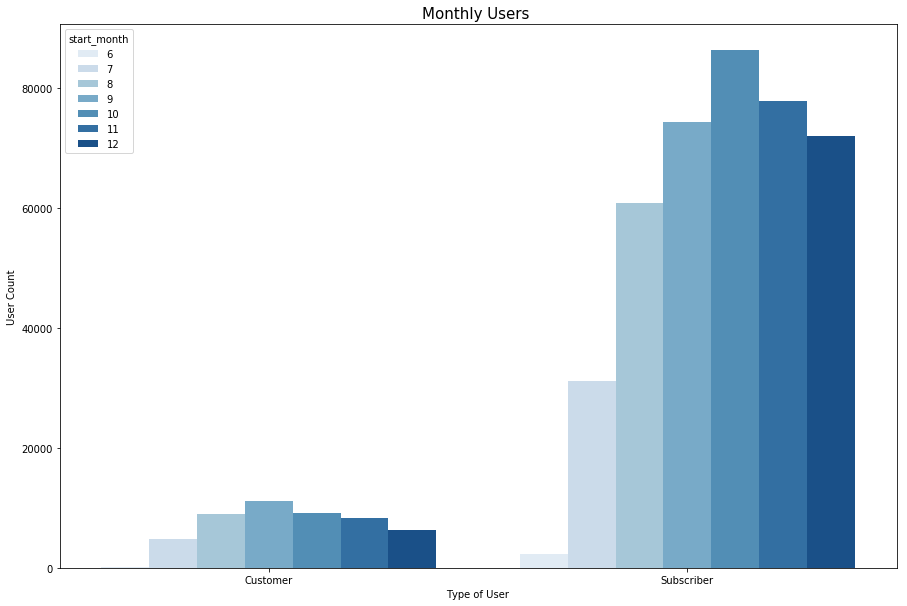

In [7]:
#count plot of start_month
plt.figure(figsize = [15, 10])
plt.title('Monthly Users ', size = "15")
ax = sb.countplot(data = df_clean, x = 'user_type', hue = 'start_month', palette = 'Blues')
ax.set(xlabel='Type of User', ylabel='User Count')
plt.show();

In [ ]:
!jupyter nbconvert explanatory_data_findings.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook explanatory_data_findings.ipynb to slides
/home/hb755d/anaconda3/envs/ONAP/lib/python3.7/site-packages/nbconvert/filters/highlight.py:138: UserWarning: IPython3 lexer unavailable, falling back on Python 3
  warn("IPython3 lexer unavailable, falling back on Python 3")
[NbConvertApp] Writing 353091 bytes to explanatory_data_findings.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/explanatory_data_findings.slides.html
Use Control-C to stop this server
[NbConvertApp] WARNING | No web browser found: could not locate runnable browser.
